<a href="https://colab.research.google.com/github/itsliya/team16/blob/main/previous_application_filtered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv)

# Installing Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
previous_application = pd.read_csv('/content/drive/MyDrive/Data X Personal Folder/Neural_Networks/previous_application.csv',encoding='unicode_escape')

# Cleaning previous_application.csv

In [4]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Drop irrelevant features 

All columns are relevant


## Categorical Variables 

Create list of Categorical Variables

In [5]:
L = [col for col in previous_application.columns if previous_application[col].dtype == object]

Distinct values per column: 

In [6]:
for col in L:
    print(col, 'has ',previous_application[col].nunique(), ' distinct values.')

NAME_CONTRACT_TYPE has  4  distinct values.
WEEKDAY_APPR_PROCESS_START has  7  distinct values.
FLAG_LAST_APPL_PER_CONTRACT has  2  distinct values.
NAME_CASH_LOAN_PURPOSE has  25  distinct values.
NAME_CONTRACT_STATUS has  4  distinct values.
NAME_PAYMENT_TYPE has  4  distinct values.
CODE_REJECT_REASON has  9  distinct values.
NAME_TYPE_SUITE has  7  distinct values.
NAME_CLIENT_TYPE has  4  distinct values.
NAME_GOODS_CATEGORY has  28  distinct values.
NAME_PORTFOLIO has  5  distinct values.
NAME_PRODUCT_TYPE has  3  distinct values.
CHANNEL_TYPE has  8  distinct values.
NAME_SELLER_INDUSTRY has  11  distinct values.
NAME_YIELD_GROUP has  5  distinct values.
PRODUCT_COMBINATION has  17  distinct values.


Columns with too many values: 
* NAME_CASH_LOAN_PURPOSE has 25 distinct values
* NAME_GOODS_CATEGORY has  28  distinct values
* PRODUCT_COMBINATION has  17  distinct values

Find which values these have

In [7]:
previous_application["NAME_CASH_LOAN_PURPOSE"].unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [8]:
previous_application["NAME_GOODS_CATEGORY"].unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [9]:
previous_application["PRODUCT_COMBINATION"].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

* I would argue that Loan Purpose is incredibly relevant. If we can, lets keep it. I´m also guessing it is highly correlated with Goods Category. We can either find the relationships to gather them and reduce dimension, or drop NAME_GOODS_CATEGORY. 

* I will drop PRODUCT_COMBINATION

In [10]:
previous_application.drop(["PRODUCT_COMBINATION"], axis = 1, inplace = True )

## Correlations Between Independent Variables

Drop if correlated 

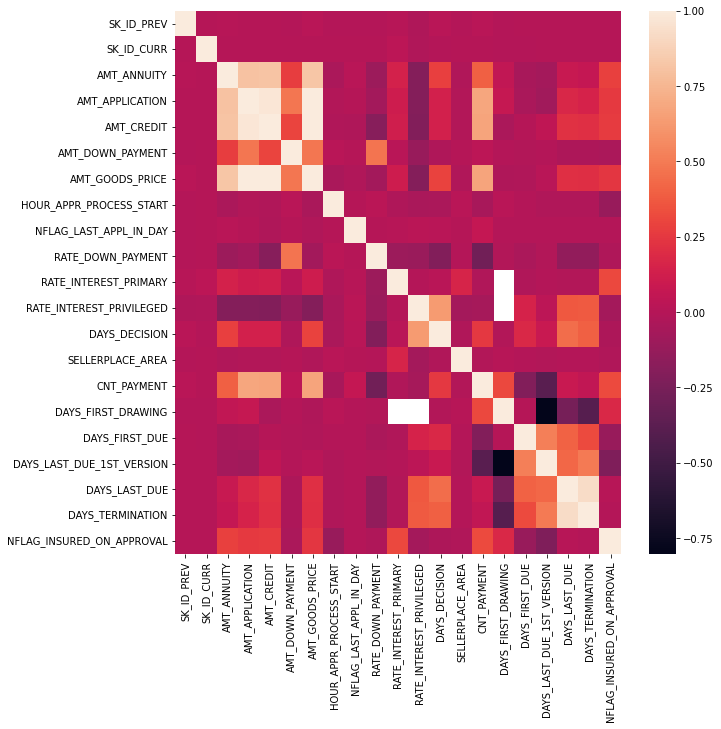

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(previous_application.corr())

* DAYS_FIRST_DRAWING, AMT_APPLICATION, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated with other variables (positiveley and negatively)

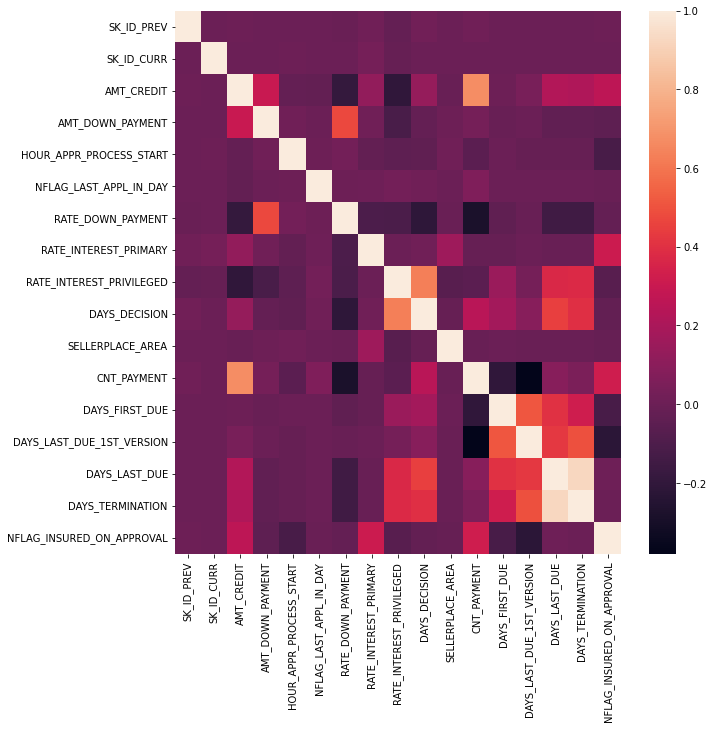

In [12]:
previous_application.drop(["DAYS_FIRST_DRAWING", "AMT_APPLICATION","AMT_ANNUITY","AMT_GOODS_PRICE"], axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(previous_application.corr())

**Variables with high correlation**

* DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, DAYS_FIRST_DUE

* RATE_DOWN_PAYMENT and AMT_DOWN_PAYMENT 

* CNT_PAYMNENT, and AMT_CREDIT 

* Correlation between each other

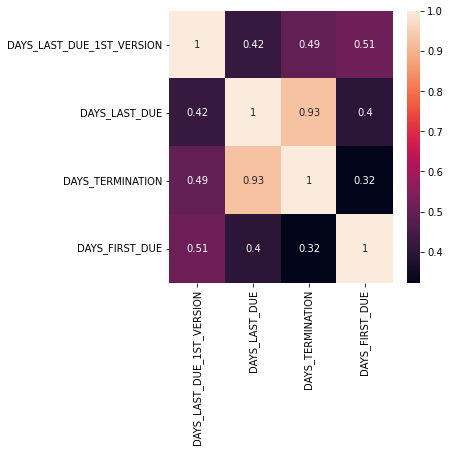

In [13]:
plt.figure(figsize = (5,5))
#plt.subplot(3,1,1)

sns.heatmap(previous_application[["DAYS_LAST_DUE_1ST_VERSION", 
                      "DAYS_LAST_DUE", "DAYS_TERMINATION", 
                      "DAYS_FIRST_DUE"]].corr(), annot=True)

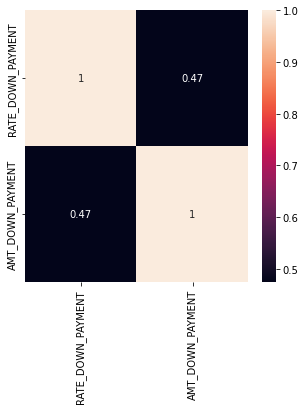

In [14]:
plt.figure(figsize = (5,5))

#plt.subplot(3,1,3)
sns.heatmap(previous_application[["RATE_DOWN_PAYMENT",
                                  "AMT_DOWN_PAYMENT"]].corr(), annot=True)

Remove DAYS_TERMINATION and DAYS_LAST_DUE

In [15]:
previous_application.drop(["DAYS_TERMINATION","DAYS_LAST_DUE"], axis = 1, inplace = True)

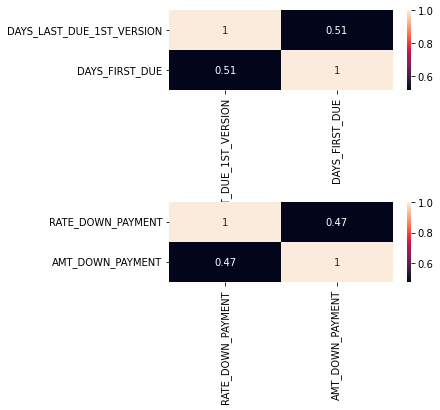

In [16]:
plt.figure(figsize = (5,5))
plt.subplot(3,1,1)

sns.heatmap(previous_application[["DAYS_LAST_DUE_1ST_VERSION", 
                      "DAYS_FIRST_DUE"]].corr(), annot=True)

plt.subplot(3,1,3)
sns.heatmap(previous_application[["RATE_DOWN_PAYMENT",
                                  "AMT_DOWN_PAYMENT"]].corr(), annot=True)

We will drop DAYS_LAST_DUE_1ST_VERSION and keep down payment rate and down payment amount because I consider them to be both important to default behaviors. If you guys believe the correlation is too high, we can drop one of them



In [17]:
previous_application.drop(["DAYS_LAST_DUE_1ST_VERSION"], axis = 1, inplace = True)

Revisit other variables to find correlations:


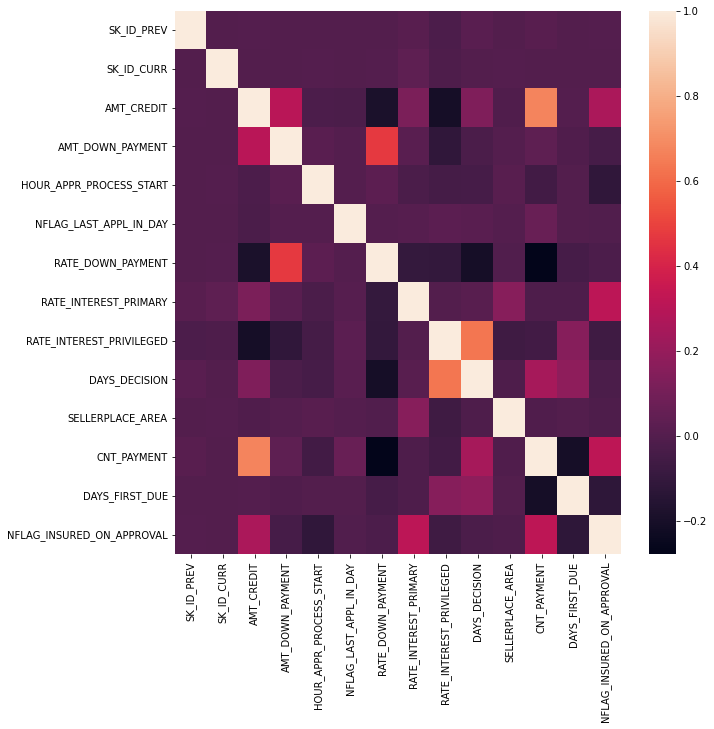

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(previous_application.corr())

drop DAYS_DECISION and RATE_INTEREST_PRIVILEGED 

In [19]:
previous_application.drop(["RATE_INTEREST_PRIVILEGED","DAYS_DECISION","CNT_PAYMENT"], axis = 1, inplace = True)

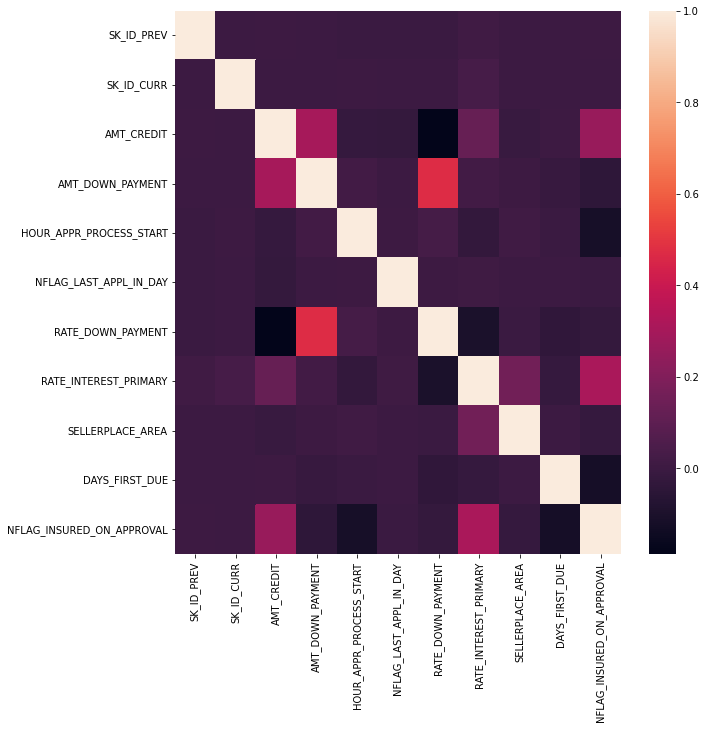

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(previous_application.corr())

In [21]:
previous_application.drop(["AMT_CREDIT","AMT_DOWN_PAYMENT"], axis = 1, inplace = True)

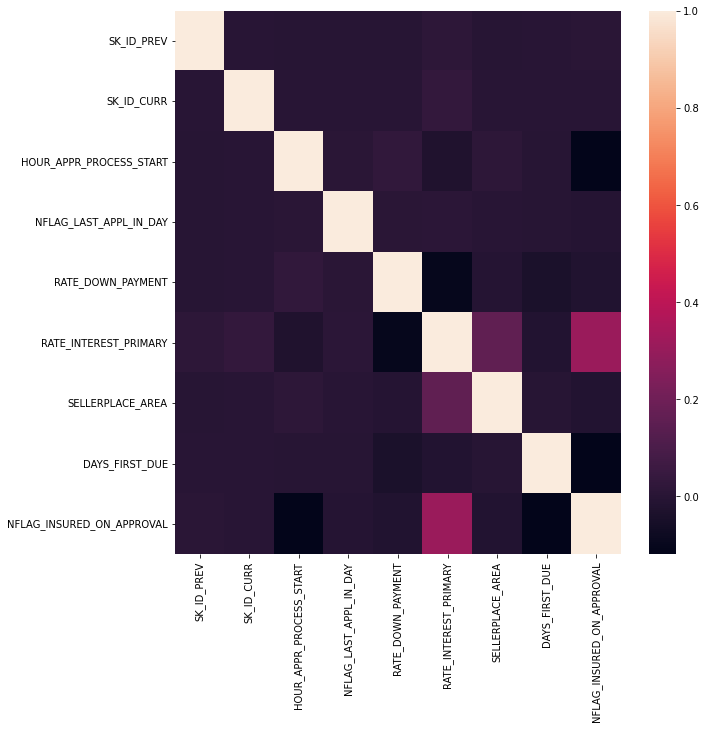

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(previous_application.corr())

In [22]:
previous_application.shape

(1670214, 24)

-------------------------------------------------------------------

In [ ]:
previous_application.to_csv("previous_application_filtered.csv.gz",compression='gzip')